<a href="https://colab.research.google.com/github/Dipendra-Pal/KNN/blob/main/KNN_fixed_no_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
# Generate synthetic dataset
def generate_dataset(n=10000):
    heights = np.random.normal(165, 7, n).astype(int)
    weights = np.random.normal(60, 8, n).astype(int)
    labels = []
    for h, w in zip(heights, weights):
        if h >= 165 and w >= 60:
            labels.append(1)
        elif h <= 160 and w <= 55:
            labels.append(0)
        else:
            labels.append(random.choice([0, 1]))
    return pd.DataFrame({'height': heights, 'weight': weights, 'class': labels})


In [ ]:
# kNN using Manhattan distance
def manhattan_distance(x1, x2):
    return abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])

def knn(X_train, y_train, x_test, k=10):
    distances = [(manhattan_distance(X_train[i], x_test), y_train[i]) for i in range(len(X_train))]
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return Counter(k_nearest).most_common(1)[0][0]

In [ ]:
# Decision boundary plotting
def plot_decision_boundary(X_train, y_train, k=10):
    h = 1
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ['#FF0000', '#00FF00']
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([knn(X_train, y_train, [x, y], k) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=cmap_bold, s=50, edgecolor='k')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.title(f'Decision Boundary (k={k})')
    plt.show()



Accuracy (k=10, Manhattan): 0.6485


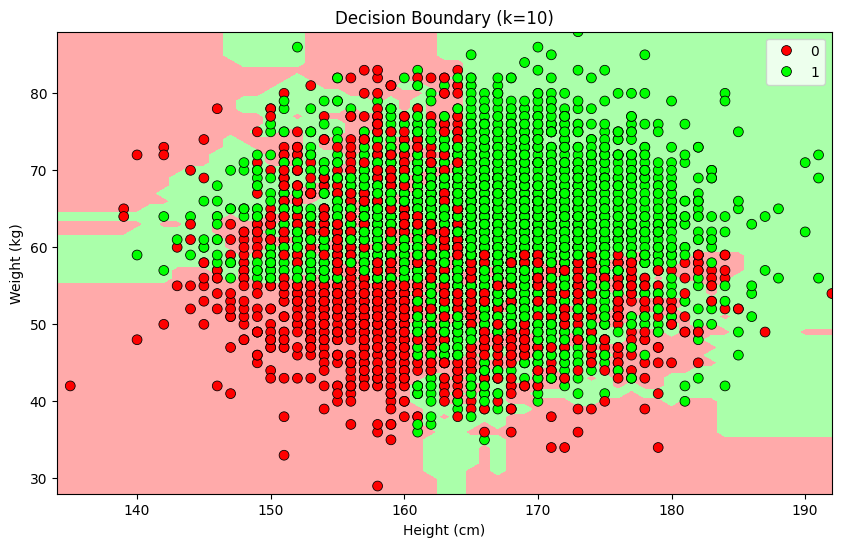

In [ ]:
# Execution
df = generate_dataset()
df.to_csv("binary_classification_dataset.csv", index=False)

X = df[['height', 'weight']].values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

predictions = [knn(X_train, y_train, x, k=10) for x in X_test]
accuracy = np.mean(predictions == y_test)
print(f"Accuracy (k=10, Manhattan): {accuracy:.4f}")

plot_decision_boundary(X_train, y_train, k=10)
